# Advanced ML: Домашнее задание 1

Николай Горев

Группа MADE-DS-22

**1.** Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

Обозначим:

$A$ - подсудимый является убийцей;

$B$ - у подсудимого данная группа крови.

"Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%" - $P(B|\bar{A}) = 0.01$

99 процентная вероятность, о которой говорит прокурор, это $0.99 = 1 - P(B|\bar{A}) = P(\bar{B}|\bar{A})$ - вероятность того, что у подсудимого была бы другая группа крови, если бы  он был невиновен.

Прокурору нужно было оценить вероятность $P(A|B)$ - вероятность того, что подсудимый является убийцей при условии, что у него данная группа крови.

Если обозначить $P(A)$ - априорную вероятность того, что подсудимый является убийцей (без информации о его группе крови), то по формуле Байеса: $$P(A|B)=\frac{P(B|A)\cdot P(A)}{P(B|A)\cdot P(A)+P(B|\bar{A})\cdot P(\bar{A})} = 
\frac{P(A)}{P(A)+0.01\cdot (1 - P(A))}$$ 


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

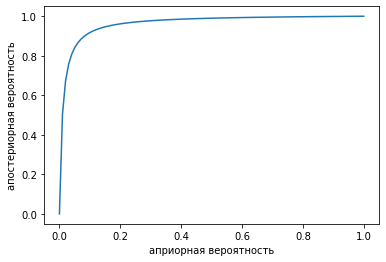

In [2]:
pa = np.linspace(0, 1, 100)

plt.plot(pa, pa/(pa + 0.01*(1-pa)))
plt.xlabel("априорная вероятность")
plt.ylabel("апостериорная вероятность")
plt.show()

Как видим, информация о группе крови существенно увеличивает вероятность вины подозреваемого, но не делает ее всегда равной или большей 99%.

**2.** Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

Адвокат неоправданно включил в число подозреваемых всех жителей города и оценил вероятность следующиего события: мы наугад выбрали произвольного жителя и при этом у него оказалась данная группа крови. Тогда вероятность того, что он является убийцей равна 0.01%.

Это согласуется с нашей формулой, полученной в предыдущей задаче. Для случайно выбранного человека из миллиона $P(A)=10^{-6}$, тогда $P(A|B) = \frac{P(A)}{P(A)+0.01\cdot (1 - P(A))} = \frac{10^{-6}}{10^{-6}+0.01\cdot (1 - 10^{-6})} = 10^{-4}$. Как мы видим, в этом случае информация о группе крови увеличила апостериорную вероятность в 100 раз. Поэтому адвокат не прав, когда предложил исключить свидетельство о группе крови из материалов дела.

На самом деле $P(A) >> 10^{-6}$ так как наверняка у большинства жителей города имеется алиби, и круг подозреваемых существенно меньше всех жителей города.

**3.** Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

Обозначим:

$A$ - данный человек болеет коронавирусом. По условию, $P(A) = 0.01$, $P(\bar{A}) = 0.99$.

$B$ - тест дал положительный результат (вирус обнаружен).

$P(B | \bar{A})$ - false positive - тест дает положительный результат при отсутствии заболевания;

$P(\bar{B}|A)$ - false negative - тест дает отрицательный результат при наличии заболевания; $P(B|A) = 1 - P(\bar{B}|A)$

По формуле Байеса, апостериорная вероятность оказаться больным при условии положительного теста: $$P(A | B) = \frac{P(B|A)\cdot P(A)}{P(B|A)\cdot P(A) + P(B|\bar{A})\cdot P(\bar{A})}$$

Апостериорная вероятность оказаться больным при условии отрицательного теста: $$P(A | \bar{B}) = \frac{P(\bar{B}|A)\cdot P(A)}{P(\bar{B}|A)\cdot P(A) + P(\bar{B}|\bar{A})\cdot P(\bar{A})}$$


In [3]:
# апостериорная вероятность оказаться больным при условии положительного теста
def pab(fp=0.05, fn=0.05):
    pa = 0.01
    pna = 1 - pa
    pba = 1 - fn
    pbna = fp
    return (pba * pa) / (pba * pa + pbna * pna)

# апостериорная вероятность оказаться больным при условии отрицательного теста
def panb(fp=0.05, fn=0.05):
    pa = 0.01
    pna = 1 - pa
    pnba = fn
    pnbna = 1 - fp
    return (pnba * pa) / (pnba * pa + pnbna * pna)

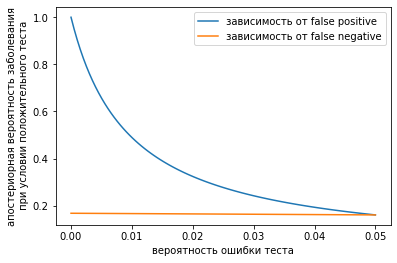

In [4]:
error_p = np.linspace(0, 0.05, 100)

plt.plot(error_p, pab(fp=error_p, fn=0.05), label="зависимость от false positive")
plt.plot(error_p, pab(fp=0.05, fn=error_p), label="зависимость от false negative")
plt.xlabel("вероятность ошибки теста")
plt.ylabel("апостериорная вероятность заболевания\n при условии положительного теста")
plt.legend()
plt.show()

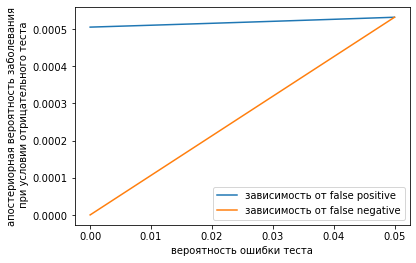

In [5]:
plt.plot(error_p, panb(fp=error_p, fn=0.05), label="зависимость от false positive")
plt.plot(error_p, panb(fp=0.05, fn=error_p), label="зависимость от false negative")
plt.xlabel("вероятность ошибки теста")
plt.ylabel("апостериорная вероятность заболевания\n при условии отрицательного теста")
plt.legend()
plt.show()

Апостериорная вероятность болезни после положительного теста сильнее зависит от вероятности false positive ошибки, а апостериорная вероятность болезни после отрицательного теста сильнее зависит от вероятности false negative ошибки.

Каковы последствия каждой из ошибок? Если тест дал положительный результат, а человек на самом деле здоров, то его запишут в "бессимптомные носители", посадят на карантин на две недели, в целом ничего страшного. Если же тест дал отрицательный результат, а человек на самом деле болен, мы его выпустим, он будет спокойно контактировать с другими людьми, при этом сможет заразить множество людей. Последствия могут быть гораздо тяжелее. 

Поэтому моя рекомендация: сосредоточиться на снижении false negative ошибки.